In [40]:
import tomopy

In [41]:
import pyfits
import numpy as np
import os

In [42]:
%gui qt

In [43]:
from IPython.html import widgets
from IPython.display import display

In [44]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [45]:
# load the OB

In [46]:
%gui qt
ob_folder = str(gui_fname())
%matplotlib inline

In [47]:
import glob

In [48]:
print ob_folder

/home/lj7/imaging/2nd-try/turbine/ob


In [49]:
from pprint import pprint

In [50]:
pprint(glob.glob(ob_folder + '/*'))
list_ob_files = glob.glob(ob_folder + '/*')

['/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0014.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0056.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0058.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0052.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0054.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0053.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0017.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0018.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0059.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0016.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0057.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0015.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob/20120618_OB_0180_0_000_0061.fits',
 '/home/lj7/imaging/2nd-try/turbine/ob

In [51]:
number_of_ob = len(list_ob_files)
print(number_of_ob)

16


In [52]:
ob_data = []
for _file in list_ob_files:
    ob_data.append(pyfits.open(_file)[0].data)
    type(pyfits.open(_file))


In [53]:
type(ob_data[0])

numpy.ndarray

In [54]:
ob_data[1]

array([[ 4613.,  4747.,  5234., ...,  6541.,  6597.,  6542.],
       [ 5210.,  5100.,  5343., ...,  6715.,  6663.,  6622.],
       [ 5352.,  5165.,  5316., ...,  6606.,  6666.,  6663.],
       ..., 
       [ 2290.,  2303.,  2304., ...,  2441.,  2445.,  2443.],
       [ 2220.,  2253.,  2261., ...,  2404.,  2430.,  2399.],
       [ 1998.,  2027.,  2163., ...,  2258.,  2272.,  2269.]], dtype=float32)

In [55]:
ob_data[0].shape

(2048, 2048)

In [56]:
# load the DF

In [57]:
%gui qt
df_folder = str(gui_fname(ob_folder))
%matplotlib inline

In [58]:
list_df_files = glob.glob(df_folder + '/*')

In [59]:
df_data = []
for _file in list_df_files:
    df_data.append(pyfits.open(_file)[0].data)

In [60]:
# load the data

In [61]:
%gui qt
data_folder = str(gui_fname(df_folder))
%matplotlib inline

In [62]:
def getFilename(filename_template, angle):
        path_pattern = filename_template % (angle,)
        dir = os.path.dirname(path_pattern)
        basename = os.path.basename(path_pattern)
        base, ext = os.path.splitext(basename)
        # bad code
        path_pattern = os.path.join(dir, base.replace(".", "[_.]") + ext)
        
        paths = glob.glob(path_pattern)
        if len(paths)!=1:
            raise RuntimeError, "template %r no good: \npath_pattern=%r" % (
                filename_template, path_pattern)
    
        path = paths[0]
        return path

In [63]:
angle=0; getFilename(data_folder+"/2012*_%.3f_*.fits", angle)

'/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_0_000_0000.fits'

In [64]:
step = 0.85

In [65]:
angles=np.arange(0.0, 181.9+step, step);
list_data_files = map(lambda x: getFilename(data_folder+"/2012*_%.3f_*.fits", x), angles);
pprint(list_data_files)
               

['/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_0_000_0000.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_0_850_0001.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_1_700_0002.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_2_550_0003.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_3_400_0004.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_4_250_0005.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_5_100_0006.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_5_950_0007.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_6_800_0008.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_7_650_0009.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_8_500_0010.fits',
 '/home/lj7/imaging/2nd-try/turbine/ct/20120618_TURBINECT_0180_9_350_0011.fits',
 '/home/lj7/imaging/2nd-try/

In [66]:
data = []
for _file in list_data_files:
    data.append(pyfits.open(_file)[0].data)

In [67]:
proj = tomopy.normalize(data, ob_data, df_data)

In [68]:
proj.shape

(215, 2048, 2048)

In [69]:
theta = np.pi/180.*(np.arange(0.0, 181.9+step, step))
print(np.arange(0.0, 181.9+step, step))

[   0.      0.85    1.7     2.55    3.4     4.25    5.1     5.95    6.8
    7.65    8.5     9.35   10.2    11.05   11.9    12.75   13.6    14.45
   15.3    16.15   17.     17.85   18.7    19.55   20.4    21.25   22.1
   22.95   23.8    24.65   25.5    26.35   27.2    28.05   28.9    29.75
   30.6    31.45   32.3    33.15   34.     34.85   35.7    36.55   37.4
   38.25   39.1    39.95   40.8    41.65   42.5    43.35   44.2    45.05
   45.9    46.75   47.6    48.45   49.3    50.15   51.     51.85   52.7
   53.55   54.4    55.25   56.1    56.95   57.8    58.65   59.5    60.35
   61.2    62.05   62.9    63.75   64.6    65.45   66.3    67.15   68.
   68.85   69.7    70.55   71.4    72.25   73.1    73.95   74.8    75.65
   76.5    77.35   78.2    79.05   79.9    80.75   81.6    82.45   83.3
   84.15   85.     85.85   86.7    87.55   88.4    89.25   90.1    90.95
   91.8    92.65   93.5    94.35   95.2    96.05   96.9    97.75   98.6
   99.45  100.3   101.15  102.    102.85  103.7   104.55  1

In [70]:
pprint(theta)

array([ 0.        ,  0.0148353 ,  0.0296706 ,  0.0445059 ,  0.05934119,
        0.07417649,  0.08901179,  0.10384709,  0.11868239,  0.13351769,
        0.14835299,  0.16318829,  0.17802358,  0.19285888,  0.20769418,
        0.22252948,  0.23736478,  0.25220008,  0.26703538,  0.28187067,
        0.29670597,  0.31154127,  0.32637657,  0.34121187,  0.35604717,
        0.37088247,  0.38571776,  0.40055306,  0.41538836,  0.43022366,
        0.44505896,  0.45989426,  0.47472956,  0.48956486,  0.50440015,
        0.51923545,  0.53407075,  0.54890605,  0.56374135,  0.57857665,
        0.59341195,  0.60824724,  0.62308254,  0.63791784,  0.65275314,
        0.66758844,  0.68242374,  0.69725904,  0.71209433,  0.72692963,
        0.74176493,  0.75660023,  0.77143553,  0.78627083,  0.80110613,
        0.81594143,  0.83077672,  0.84561202,  0.86044732,  0.87528262,
        0.89011792,  0.90495322,  0.91978852,  0.93462381,  0.94945911,
        0.96429441,  0.97912971,  0.99396501,  1.00880031,  1.02

In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib notebook

/home/lj7/anaconda2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [141]:
# proj = np.r_[proj[0:70], proj[81:225]].copy()
#theta = np.r_[theta[0:70], theta[81:225]].copy()

In [73]:
rot_center = tomopy.find_center(proj, theta, emission=False, init=1024, tol=0.5)
print("Center of rotation: ", rot_center)

('Center of rotation: ', array([ 1024.4]))


In [74]:
print proj.shape
tomopy.write_center(proj.copy(), theta, dpath='~/imaging/2nd-try/tmp', emission=False)

(215, 2048, 2048)


In [75]:
print proj.shape
rot_center = tomopy.find_center_vo(proj.copy())
print("Center of rotation: ", rot_center)

(215, 2048, 2048)
('Center of rotation: ', None)


In [76]:
proj = tomopy.normalize_bg(data)

<IPython.core.display.Javascript object>


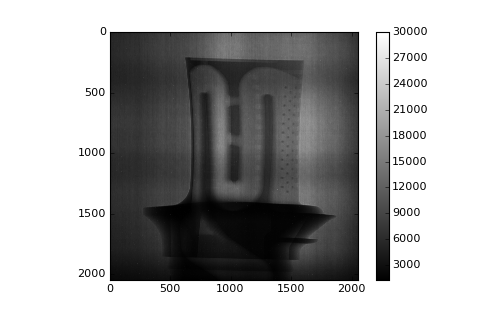

<matplotlib.colorbar.Colorbar instance at 0x7f7856cf9fc8>

In [77]:
fig, ax = plt.subplots()
im = plt.imshow(data[0], cmap='gray') #, vmin=0.2, vmax=1.2
fig.colorbar(im)

<IPython.core.display.Javascript object>


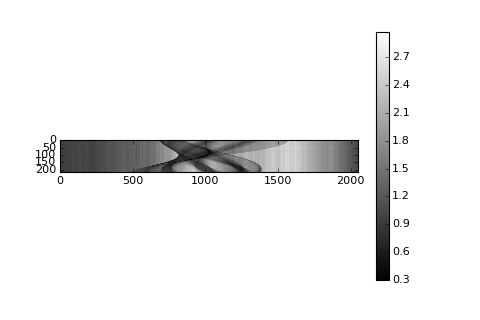

<matplotlib.colorbar.Colorbar instance at 0x7f7856d3ae60>

In [78]:
fig, ax = plt.subplots()
im = plt.imshow(proj[:, 1000, :], cmap='gray')
fig.colorbar(im)

In [80]:
tomopy.write_tiff_stack(proj, fname='~/imaging/2nd-try/tmp', axis=1, overwrite=True)

<IPython.core.display.Javascript object>


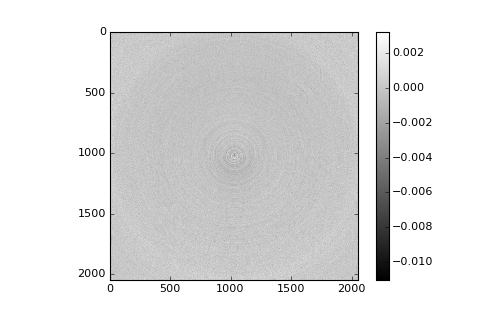

<matplotlib.colorbar.Colorbar instance at 0x7f77f1b09d40>

In [91]:
rec = tomopy.recon(proj[:, 300:201, :], theta=theta, center=1024.4, algorithm='gridrec', emission=False)

fig, ax = plt.subplots()
im = plt.imshow(rec[0], cmap='gray')
fig.colorbar(im)

In [83]:
print proj.shape, rec.shape
tomopy.write_tiff_stack(rec, fname='~/imaging/2nd-try/recon/tmp', axis=0, overwrite=True)

(215, 2048, 2048) (1, 2048, 2048)
